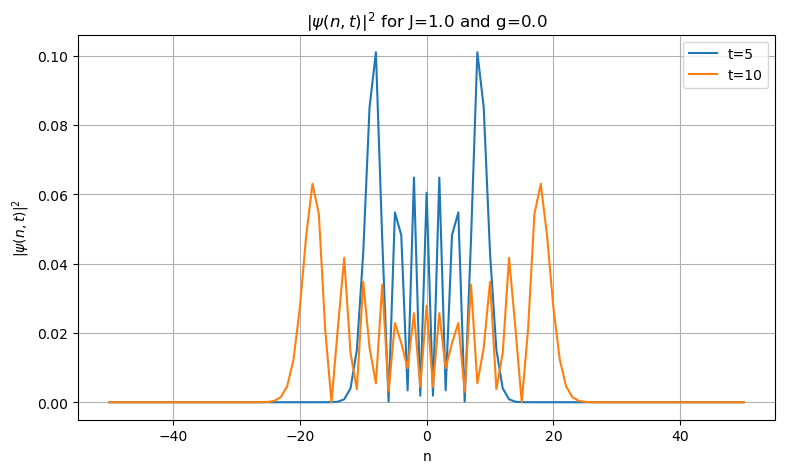

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eigh


N = 50          
J = 1.0           
g = 0.0          
times = [5, 10]   

x = np.arange(-N, N+1)
M = len(x)
eps = np.random.normal(loc=0.0, scale=g/2, size=M)   # np.random.uniform(-g/2, g/2, size=M)
H = np.diag(eps) + np.diag([-J]*(M-1), 1) + np.diag([-J]*(M-1), -1)

psi0 = np.zeros(M, dtype=complex)
psi0[N] = 1.0   

E, U = eigh(H)
c0 = U.conj().T @ psi0


plt.figure(figsize=(9,5))
for t in times:
    psi_t = U @ (np.exp(-1j * E * t) * c0)
    rho = np.abs(psi_t)**2
    plt.plot(x, rho, label=f"t={t}")
    
plt.xlabel("n")
plt.ylabel(r"$|\psi(n,t)|^2$")
plt.title(rf"$|\psi(n,t)|^2$ for J={J} and g={g}")
plt.legend()
plt.grid()
#plt.savefig('tight-binding-disorder.png', dpi=300)
plt.show()
